# Computational Mathematics

## Approximating functions - Lecture 2

### Polynomial interpolation

Continue our discussion from the last Lecture, we would like to represent a function nicely by a polynomial. 
By "nicely" we mean that the error between the function and the polynomial is small.

Given a function $f(x)$, and a polynomial interpolation $p(x)$, we can define the error, the so-called infinity-norm, as 
$$\|f(x)-p(x)\|_{\infty} = \sup_{x}|f(x)-p(x)|.$$
According to Weierstrass Approximation Theorem, there must exists some polynomial $p(x)$ such that the error is small if $f$ is continous.

But how can we construct this polynomial? A simple answer is that we just choose $n$ points on the interval and interpolate a polynomial that passes through these $n$ data points, and hopefully, the error will decrease as we choose more and more points.

### Interpolation error

When interpolating a given function $f$ by a polynomial of degree $n$ at the nodes $x_0$, $\cdots$, $x_n$ we get the error
$$f(x) - p(x) = f[x_0, \cdots, x_n, x] \prod^n_{i=0}(x-x_i),$$
where $f[x_0, \cdots, x_n, x]$ is the notation for divided differences.

So in principle, to have a "best" interpolation we should choose nodes such that $\prod^n_{i=0}(x-x_i)$ is minimized.

### Equially spaced Nodes
Consider a function $f$ on $[-1, 1]$, we interpolate the function on equally spaced nodes 
$$x_k = -1 + 2\frac{k-1}{n-1} \quad k=1,2,\cdots,n,$$
by a polynomial $p(x)$. 
Then, $p(x)$ is a $n-1$th-degree polynomial that has value $p(x_k)=f(x_k)$ at $x_k$ for each $k$.

One should note that this is not a good choice of interpolating a function as there will be oscilations at the edge of the interval, the so-called Runge's phenomenon. See [wiki](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) for fruther details.

### Chebyshev Nodes

Suppose that we want to find a polynomial interpolation $p$ for some function $f$ on $[-1, 1]$, we can consider
$$x_k = \cos(\frac{2k-1}{2n}) \quad k=1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n-1$ degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.
One can prove that
$$|f(x)-p(x)| \leq \frac{1}{2^{n-1}n!}\max_{\xi\in[-1,1]}|f^{n}(\xi)|,$$
which gives us small error as $n$ become large.

For more details one can read "Chebyshev nodes" in [wiki](https://en.wikipedia.org/wiki/Chebyshev_nodes).

### Example

We first illustrate why we don't simply choose random nodes to do the polynomial interpolation.

We choose some points on $[-1,1]$.

$-1=x_0<x_1<\cdots<x_5=1$, $x_{i1} := [x_0 , \cdots , x_5]^{\top}$

In [15]:
n=6;
xi1 = [-1; 2*rand(n-2).-1; 1]

6-element Array{Float64,1}:
 -1.0               
  0.0977964692811728
  0.1035145900993033
  0.7707158893961119
  0.5538683374663029
  1.0               

Construct $p_1(x)=(x-x_0)(x-x_1)\cdots(x-x_5)$. Define $Error = \max_{x\in [-1,1]}p_1(x)$. Plot $|p_1(x)|$.

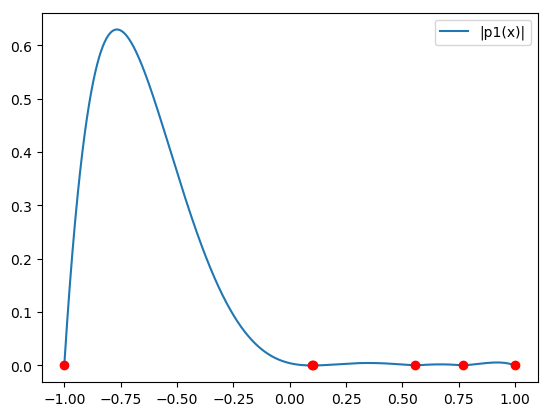

Error=0.6295320984864571


In [16]:
x = range(-1,stop=1,length=1000);
p1 = x.-xi1[1];
for ii=1:n-1
    p1 = p1.*(x.-xi1[ii+1]);
end
println("Error=",maximum(abs.(p1)))
using PyPlot
plot(x, abs.(p1),label="|p1(x)|");
plot(xi1, zeros(n,1), "or");
plt.legend();

We can see that the largest value of $p_1(x)$ occurs between $x_0$ and $x_1$. 

Now let $x_2:=-0.5$. Construct $p_2(x)=(x-x_0)(x-x_1)\cdots(x-x_5)$. Define $Error = \max_{x\in [-1,1]}p_2(x)$. Plot $|p_2(x)|$.

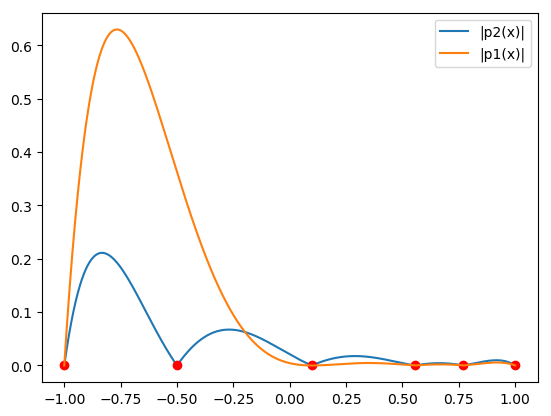

Error=0.21102651030847935


In [17]:
xi2 = zeros(6,1);
for ii=1:n
    xi2[ii] = xi1[ii];
end
xi2[3] = -0.5;
p2 = x.-xi2[1];
for ii=1:n-1
    p2 = p2.*(x.-xi2[ii+1]);
end
println("Error=",maximum(abs.(p2)))
plot(x, abs.(p2),label="|p2(x)|");
plot(xi2, zeros(n,1), "or");
plot(x, abs.(p1),label="|p1(x)|");
plt.legend();

Consider chebychev nodes
$$x_{cheb}[n] := \cos(\frac{2n-1}{2n}\pi)$$ for $n=1,2,\cdots,6$

In [18]:
xi_cheb = cos.(((1:n).-0.5)*pi/n)

6-element Array{Float64,1}:
  0.9659258262890683 
  0.7071067811865476 
  0.25881904510252074
 -0.25881904510252063
 -0.7071067811865475 
 -0.9659258262890682 

Construct $p_{cheb}(x)=(x-x_{cheb}[1])(x-x_{cheb}[2])\cdots(x-x_{cheb}[6])$. Define $Error = \max_{x\in [-1,1]}p_{cheb}(x)$. Plot $p_{cheb}(x)$.

Do you see that the error is small?

## Example1
We now try to interpolate some function. Let us try $f(x) = \cos(x^3)$ on $[-1,1]$.
We use the method of Chebyshev nodes.

We first try 5 nodes.

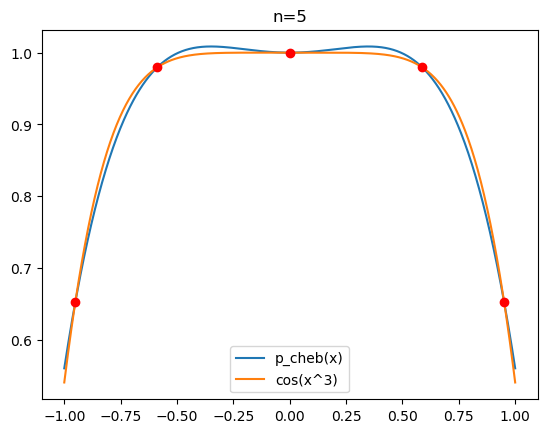

Error=0.019729067083358864


In [4]:
using LinearAlgebra

# Consturct Nodes
n=5;
xi_cheb = cos.(((1:n).-0.5)*pi/n);
f_cheb = cos.(xi_cheb.^3);

# Calculate Coefficenits of polynomial
A=zeros(n,n);
for i=1:n
    A[:,i] = xi_cheb.^(n-i)
end
c = A\f_cheb;

# Construct polynomial
x3 = range(-1,stop=1,length=1000);
p_cheb=zeros(1000);
for i=1:n
    p_cheb += c[i].*x3.^(n-i)
end
plot(x3, p_cheb,label="p_cheb(x)");
plot(x3, cos.(x3.^3),label="cos(x^3)");
plot(xi_cheb, f_cheb,"or");
plt.legend();
plt.title("n=5")
println("Error=",maximum(abs.(p_cheb-cos.(x3.^3))));

Now let us try 10 nodes.

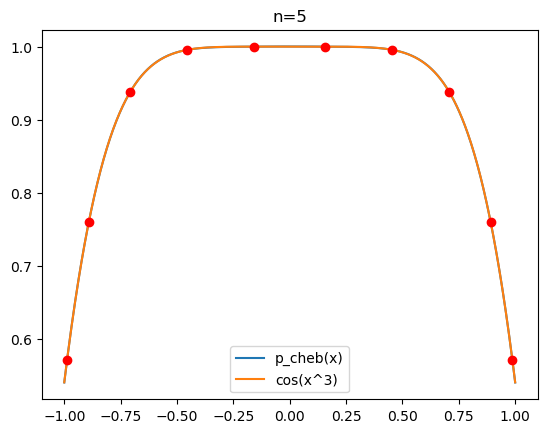

Error=0.0002335758520978226


In [5]:
# Consturct Nodes
n=10;
xi_cheb = cos.(((1:n).-0.5)*pi/n);
f_cheb = cos.(xi_cheb.^3);

# Calculate Coefficenits of polynomial
A=zeros(n,n);
for i=1:n
    A[:,i] = xi_cheb.^(n-i)
end
c = A\f_cheb;

# Construct polynomial
x3 = range(-1,stop=1,length=1000);
p_cheb=zeros(1000);
for i=1:n
    p_cheb += c[i].*x3.^(n-i)
end
plot(x3, p_cheb,label="p_cheb(x)");
plot(x3, cos.(x3.^3),label="cos(x^3)");
plot(xi_cheb, f_cheb,"or");
plt.legend();
plt.title("n=5")
println("Error=",maximum(abs.(p_cheb-cos.(x3.^3))));

We can see that the polynomial fits the function pretty well.

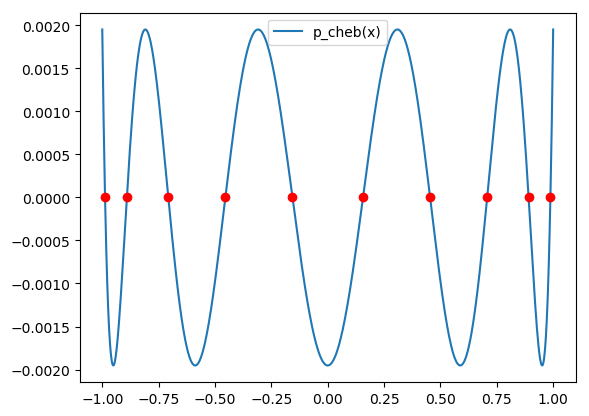

Error=0.0019531250000000126


In [6]:
x2 = range(-1,stop=1,length=1000);
p_cheb = x2.-xi_cheb[1];
for ii=1:n-1
    p_cheb = p_cheb.*(x2.-xi_cheb[ii+1]);
end
println("Error=",maximum(abs.(p_cheb)))
plot(x2, (p_cheb),label="p_cheb(x)");
plot(xi_cheb, zeros(n,1), "or");
plt.legend();